<a href="https://colab.research.google.com/github/ambideXtrous9/All-Sklearn-Classifiers-on-Titanic-Dataset/blob/main/MLXtend_StackingCVClassifier%2BPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
!pip install --quiet scikit-learn
!pip install --quiet mlxtend

In [239]:
import sklearn

In [240]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [241]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from mlxtend.classifier import StackingClassifier
from sklearn import ensemble
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

-------------------------


# **Loading Dataset**

In [243]:
path = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [244]:
df = pd.read_csv(path)

In [245]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## **Statistics of the Dataset**

In [246]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## **Checking Null Values**

In [247]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **Replacing Null Values**

In [248]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)

## **Dropping Unnecessary columns**

In [249]:
drop_column = ['PassengerId','Cabin', 'Ticket','Name']
df.drop(drop_column, axis=1, inplace = True)

In [250]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [251]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [252]:
df.shape

(891, 8)

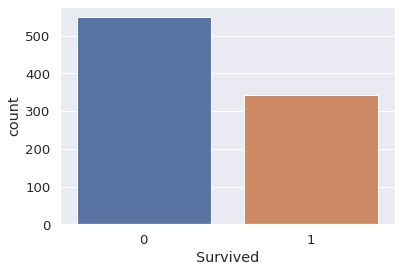

In [253]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df.Survived)

# **Train-Test Split**

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
y = df.pop('Survived')
X = df

X_train,X_test,y_train,y_test = train_test_split(X.index,y,random_state=104, test_size=0.10,stratify=y,shuffle=True)

In [256]:
X_train = X.iloc[X_train]
X_test = X.iloc[X_test]

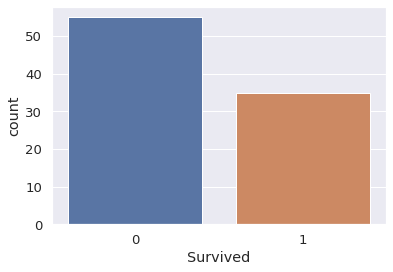

In [257]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(y_test)

In [258]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
534,3,female,30.0,0,0,8.6625,S
510,3,male,29.0,0,0,7.7500,Q
18,3,female,31.0,1,0,18.0000,S
172,3,female,1.0,1,1,11.1333,S
76,3,male,28.0,0,0,7.8958,S


## **Transforming Categorical Columns using LabelEncoder()**

In [259]:
encoders = {}
cat_columns = ['Sex','Embarked']
for i in cat_columns:
    encoders[i] = LabelEncoder()
    X_train[i] = encoders[i].fit_transform(X_train[i])
    
for i in cat_columns:
    X_test[i] = encoders[i].transform(X_test[i])

In [260]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
534,3,0,30.0,0,0,8.6625,2
510,3,1,29.0,0,0,7.7500,1
18,3,0,31.0,1,0,18.0000,2
172,3,0,1.0,1,1,11.1333,2
76,3,1,28.0,0,0,7.8958,2


## **PCA Plot**

[Text(0.5, 1.0, 'PCA projection')]

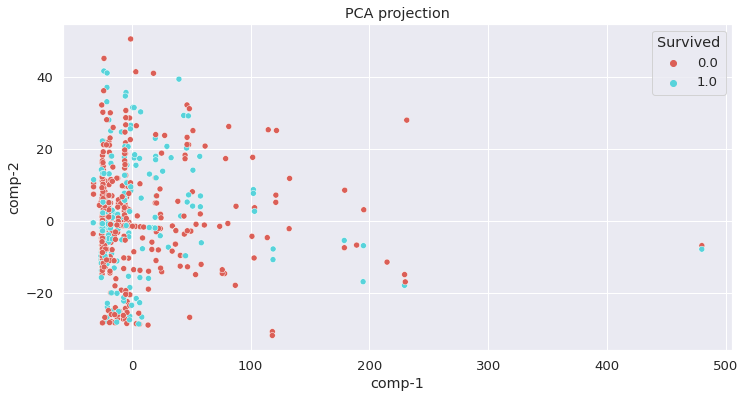

In [261]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

z = pca.fit_transform(X_train)
df3 = pd.DataFrame()

df3 = pd.DataFrame()
df3["comp-1"] = z[:,0]
df3["comp-2"] = z[:,1]

plt.figure(figsize=(12,6))
sns.scatterplot(x="comp-1", y="comp-2",hue=y_train,palette=sns.color_palette("hls", 2),data=df3).set(title="PCA projection") 


## **TSNE Plot**

[Text(0.5, 1.0, 'TSNE projection')]

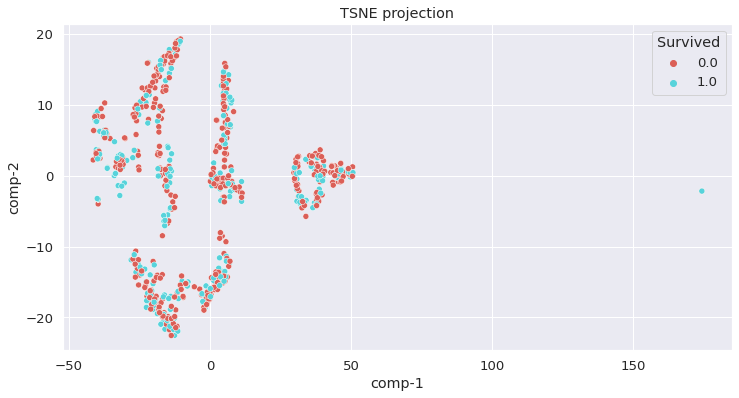

In [262]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=123)

z = tsne.fit_transform(X_train)
df3t = pd.DataFrame()
df3t["comp-1"] = z[:,0]
df3t["comp-2"] = z[:,1]

plt.figure(figsize=(12,6))
sns.scatterplot(x="comp-1", y="comp-2",hue=y_train,palette=sns.color_palette("hls", 2),data=df3t).set(title="TSNE projection") 

# **Stacking Classifiers**

<img src='http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png'>

In [263]:
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingCVClassifier

In [264]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [265]:
import xgboost as xgb

In [266]:
clf1 = KNeighborsClassifier()
clf2 = SVC(probability=True)
clf3 = NuSVC(probability=True)
clf4 = xgb.XGBClassifier()
clf5 = DecisionTreeClassifier()
clf6 = RandomForestClassifier()
clf7 = AdaBoostClassifier()
clf8 = GradientBoostingClassifier()
clf9 = GaussianNB()
clf10 = LinearDiscriminantAnalysis()
clf11 = QuadraticDiscriminantAnalysis()

In [267]:
classifiers = [clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11]

In [268]:
sclf = StackingCVClassifier(classifiers=classifiers, 
                            meta_classifier=clf4)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=10,
                    refit=True)

In [269]:
sclf.fit(X_train.values, y_train.values)

StackingCVClassifier(classifiers=[KNeighborsClassifier(), SVC(probability=True),
                                  NuSVC(probability=True), XGBClassifier(),
                                  DecisionTreeClassifier(),
                                  RandomForestClassifier(),
                                  AdaBoostClassifier(),
                                  GradientBoostingClassifier(), GaussianNB(),
                                  LinearDiscriminantAnalysis(),
                                  QuadraticDiscriminantAnalysis()],
                     meta_classifier=XGBClassifier())

In [270]:
test_predictions = sclf.predict(X_test.values)

In [271]:
from sklearn.metrics import accuracy_score

In [272]:
accuracy_score(y_test.values,test_predictions)

0.8666666666666667

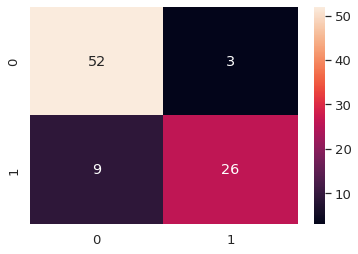

In [273]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, test_predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [274]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test.values, test_predictions)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.85245902 0.89655172]
recall: [0.94545455 0.74285714]
fscore: [0.89655172 0.8125    ]
support: [55 35]


# **On PCA Data**

In [275]:
clf1 = KNeighborsClassifier()
clf2 = SVC(probability=True)
clf3 = NuSVC(probability=True)
clf4 = xgb.XGBClassifier()
clf5 = DecisionTreeClassifier()
clf6 = RandomForestClassifier()
clf7 = AdaBoostClassifier()
clf8 = GradientBoostingClassifier()
clf9 = GaussianNB()
clf10 = LinearDiscriminantAnalysis()
clf11 = QuadraticDiscriminantAnalysis()

In [276]:
classifiers = [clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11]

In [277]:
sclf = StackingCVClassifier(classifiers=classifiers, 
                            meta_classifier=clf4)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=10,
                    refit=True)

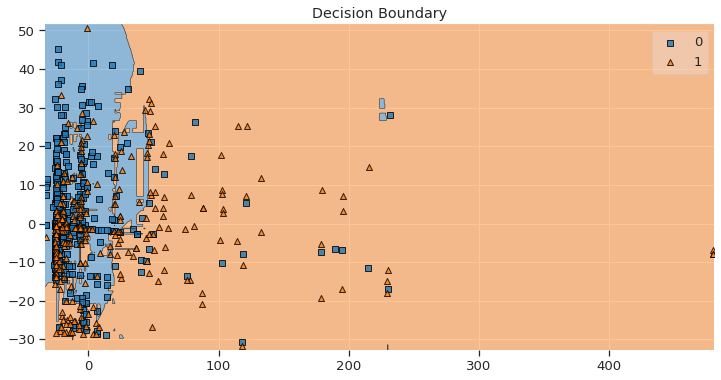

In [278]:
sclf.fit(df3.values, y_train.values)

fig = plt.figure(figsize=(12,6))
fig = plot_decision_regions(X=df3.values, y=y_train.values, clf=sclf)
plt.title("Decision Boundary")
plt.show()

In [279]:
z = pca.transform(X_test)
dft = pd.DataFrame()

dft = pd.DataFrame()
dft["comp-1"] = z[:,0]
dft["comp-2"] = z[:,1]

In [280]:
test_predictions = sclf.predict(dft.values)
accuracy_score(y_test.values,test_predictions)

0.6666666666666666